## Import Package

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn import metrics
from sklearn.metrics import classification_report, f1_score, recall_score, precision_score, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

## Data Loading

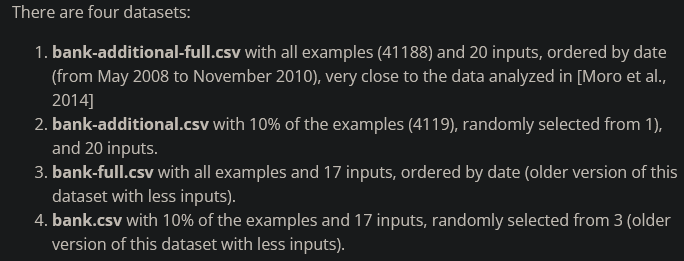

In [68]:
# Membuka File dataset dengan Pandas
df = pd.read_csv('bank-additional-full.csv', sep=';')

pd.set_option('display.max_columns', None)

In [69]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


## Data Cleaning

In [70]:
# Cek jumlah baris dan kolom
row, col = df.shape
cek_baris_kolom = pd.DataFrame({'Jumlah Baris': [row], 'Jumlah Kolom': [col]})
cek_baris_kolom

,Jumlah Baris,Jumlah Kolom
0,41188,21


In [71]:
# Cek tipe data pada masing kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [72]:
# Cek nunique
cek_nunique = df.nunique()
cek_nunique = cek_nunique.to_frame(name='Jumlah')
cek_nunique.reset_index(inplace=True)
cek_nunique.rename(columns={'index': 'Kolom'}, inplace=True)
cek_nunique

,Kolom,Jumlah
0,age,78
1,job,12
2,marital,4
3,education,8
4,default,3
5,housing,3
6,loan,3
7,contact,2
8,month,10
9,day_of_week,5


In [73]:
# Cek persen data yang duplikat dengan isna 0-100%
Cek_persen_missing_data = df.isna().sum() * 100 / len(df)
Cek_persen_missing_data = Cek_persen_missing_data.to_frame(
    name='% Missing Value')
Cek_persen_missing_data.reset_index(inplace=True)
Cek_persen_missing_data.rename(columns={'index': 'Kolom'}, inplace=True)
Cek_persen_missing_data

,Kolom,% Missing Value
0,age,0.0
1,job,0.0
2,marital,0.0
3,education,0.0
4,default,0.0
5,housing,0.0
6,loan,0.0
7,contact,0.0
8,month,0.0
9,day_of_week,0.0


In [74]:
# CeK Jumlah Missing Value pada masing-masing feature yang ada
cek_missing_value = df.isna().sum().reset_index()

cek_missing_value.columns = ['Kolom', 'Jumlah Missing Value']

cek_missing_value

# Tidak ada Missing Value pada semua kolom

,Kolom,Jumlah Missing Value
0,age,0
1,job,0
2,marital,0
3,education,0
4,default,0
5,housing,0
6,loan,0
7,contact,0
8,month,0
9,day_of_week,0


In [75]:
# Cek jumlah Duplikat yang sama persis
df[df.duplicated(keep=False)]

# Ada banyak data duplikat yang sama persis

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1265,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,124,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,124,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12260,36,retired,married,unknown,no,no,no,telephone,jul,thu,88,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,88,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14155,27,technician,single,professional.course,no,no,no,cellular,jul,mon,331,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,331,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16819,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,43,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,43,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18464,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,128,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,128,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no


In [76]:
# Menggambil seluruh kolom
kolom = df.columns.tolist()

# Menghapus data duplikat yang sama persis
df = df.drop_duplicates(subset=kolom)

# Cek hasil hapus data duplikat yang sama persis
df[df.duplicated(keep=False)]

# Data sudah bersih dari duplikat yang sama persis

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y


In [77]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [78]:
# Ganti unknown menjadi np.nan dari kolom : job, marital, education, default, housing, loan,

temp = {'yes': 1,
        'no': 0,
        'unknown': np.nan}
mode_job = df['job'].mode()[0]
mode_marital = df['marital'].mode()[0]
mode_education = df['education'].mode()[0]

df.loc[:, 'job'] = df['job'].replace('unknown', mode_job)
df.loc[:, 'marital'] = df['marital'].replace('unknown', mode_marital)
df.loc[:, 'education'] = df['education'].replace('unknown', mode_education)
df.loc[:, 'default'] = df['default'].map(temp)
df.loc[:, 'housing'] = df['housing'].map(temp)
df.loc[:, 'loan'] = df['loan'].map(temp)

## Data Exploration

In [79]:
# Penjelasan Kolom yang ada di dataset
# age               : Umur
# job               : Pekerjaan
# marital           : Status Pernikahan
# education         : Tingkatan Pendidikan
# default           : Catatan Kredit Gagal Bayar
# housing           : Kredit Peminjaman Perumahan
# loan              : Kredit Pribadi tidak terkait dengan properti
# contact           : Tipe Komunikasi misal celuler, telepon
# month             : Bulan Terakhir Dihubungi
# day_of_week       : Hari Terakhir Dihubungi
# duration          : Durasi Terakhir Dihubungi
# campaign          : Jumlah Dihubungi Selama Masa Campaign
# pdays             : Jumlah Hari Sejak Terakhir Dihubungi
# previous          : Jumlah Kontak Sebelum Campaign
# poutcome          : Hasil Kampanye Sebelumnya
# emp.var.rate      : Tingkat Variasi Lapangan Pekerjaan
# cons.price.idx    : Indeks Harga Konsumen
# cons.conf.idx     : Indeks Keyakinan Konsumen
# euribor3m         : Suku Bunga Euribor 3 Bulan
# nr.employed       : Jumlah Karyawan
# y                 : Hasil Menerima/Menolak

### Statistika Descriptive

In [80]:
# Kondisi pelanggan menerima tawaran dari bank dengan set y = yes
temp_descriptive = df[df['y'] == 'yes']

temp_descriptive.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4639.000000,4639.000000,4639.000000,4639.000000,4639.000000,4639.000000,4639.000000,4639.000000,4639.000000,4639.000000
mean,40.912266,553.256090,2.051951,791.990946,0.492779,-1.233089,93.354577,-39.791119,2.123362,5095.120069
std,13.838838,401.190736,1.666353,403.439220,0.860406,1.623616,0.676592,6.139657,1.742717,87.581640
min,17.000000,37.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,31.000000,253.500000,1.000000,999.000000,0.000000,-1.800000,92.893000,-46.200000,0.849000,5017.500000
50%,37.000000,449.000000,2.000000,999.000000,0.000000,-1.800000,93.200000,-40.400000,1.266000,5099.100000
75%,50.000000,741.500000,2.000000,999.000000,1.000000,-0.100000,93.918000,-36.100000,4.406000,5191.000000
max,98.000000,4199.000000,23.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [81]:
# Kondisi pelanggan menerima tawaran dari bank dengan set y = yes
temp_descriptive = df[df['y'] == 'yes']
temp_descriptive = temp_descriptive.groupby(['marital', 'job'])['age'].agg(
    [np.mean, lambda x: x.mode().iloc[0], 'count']).reset_index()

temp_descriptive.columns = ['marital', 'job', 'mean_age', 'mode_age', 'count']
temp_descriptive

,marital,job,mean_age,mode_age,count
0,divorced,admin.,45.577778,41,135
1,divorced,blue-collar,42.037736,33,53
2,divorced,entrepreneur,44.857143,35,14
3,divorced,housemaid,57.000000,38,16
4,divorced,management,46.692308,53,39
5,divorced,retired,72.739130,88,92
6,divorced,self-employed,41.875000,25,16
7,divorced,services,43.484848,44,33
8,divorced,student,35.666667,37,3
9,divorced,technician,40.738462,41,65


Kesimpulan : 
* Rata-rata usia pelanggan yang paling sering menerima tawaran dari bank pertama-tama adalah pelanggan dengan status pernikahan "married" dan pekerjaan sebagai "admin," dengan usia rata-rata sekitar 41 tahun. Jumlah pelanggan dalam kategori ini adalah sebanyak 651. 
    
* Pelanggan dengan status pernikahan "married" yang paling sering menerima tawaran kedua adalah yang bekerja sebagai "blue-collar," dengan usia rata-rata sekitar 41 tahun, dengan total sebanyak 421.

* Di antara pelanggan yang berstatus pernikahan "single," pelanggan yang paling sering menerima tawaran dan bekerja sebagai "admin" memiliki usia rata-rata sekitar 32 tahun, dengan total sebanyak 566 pelanggan.

* Di antara pelanggan yang berstatus pernikahan "single," pelanggan yang paling sering menerima tawaran kedua adalah yang bekerja sebagai "technician" dengan usia rata-rata sekitar 32 tahun, dengan total sebanyak 279 pelanggan.

* Pelanggan dengan status pernikahan "divorced" yang paling sering menerima tawaran juga bekerja sebagai "admin" dengan usia rata-rata sekitar 44 tahun, dan jumlah pelanggan dalam kategori ini adalah 132.

* Pelanggan dengan status pernikahan "divorced" yang paling sering menerima tawaran kedua adalah yang bekerja sebagai "retired" dengan usia rata-rata sekitar 72 tahun, dengan jumlah pelanggan sebanyak 92 orang.


### Distribusi Data

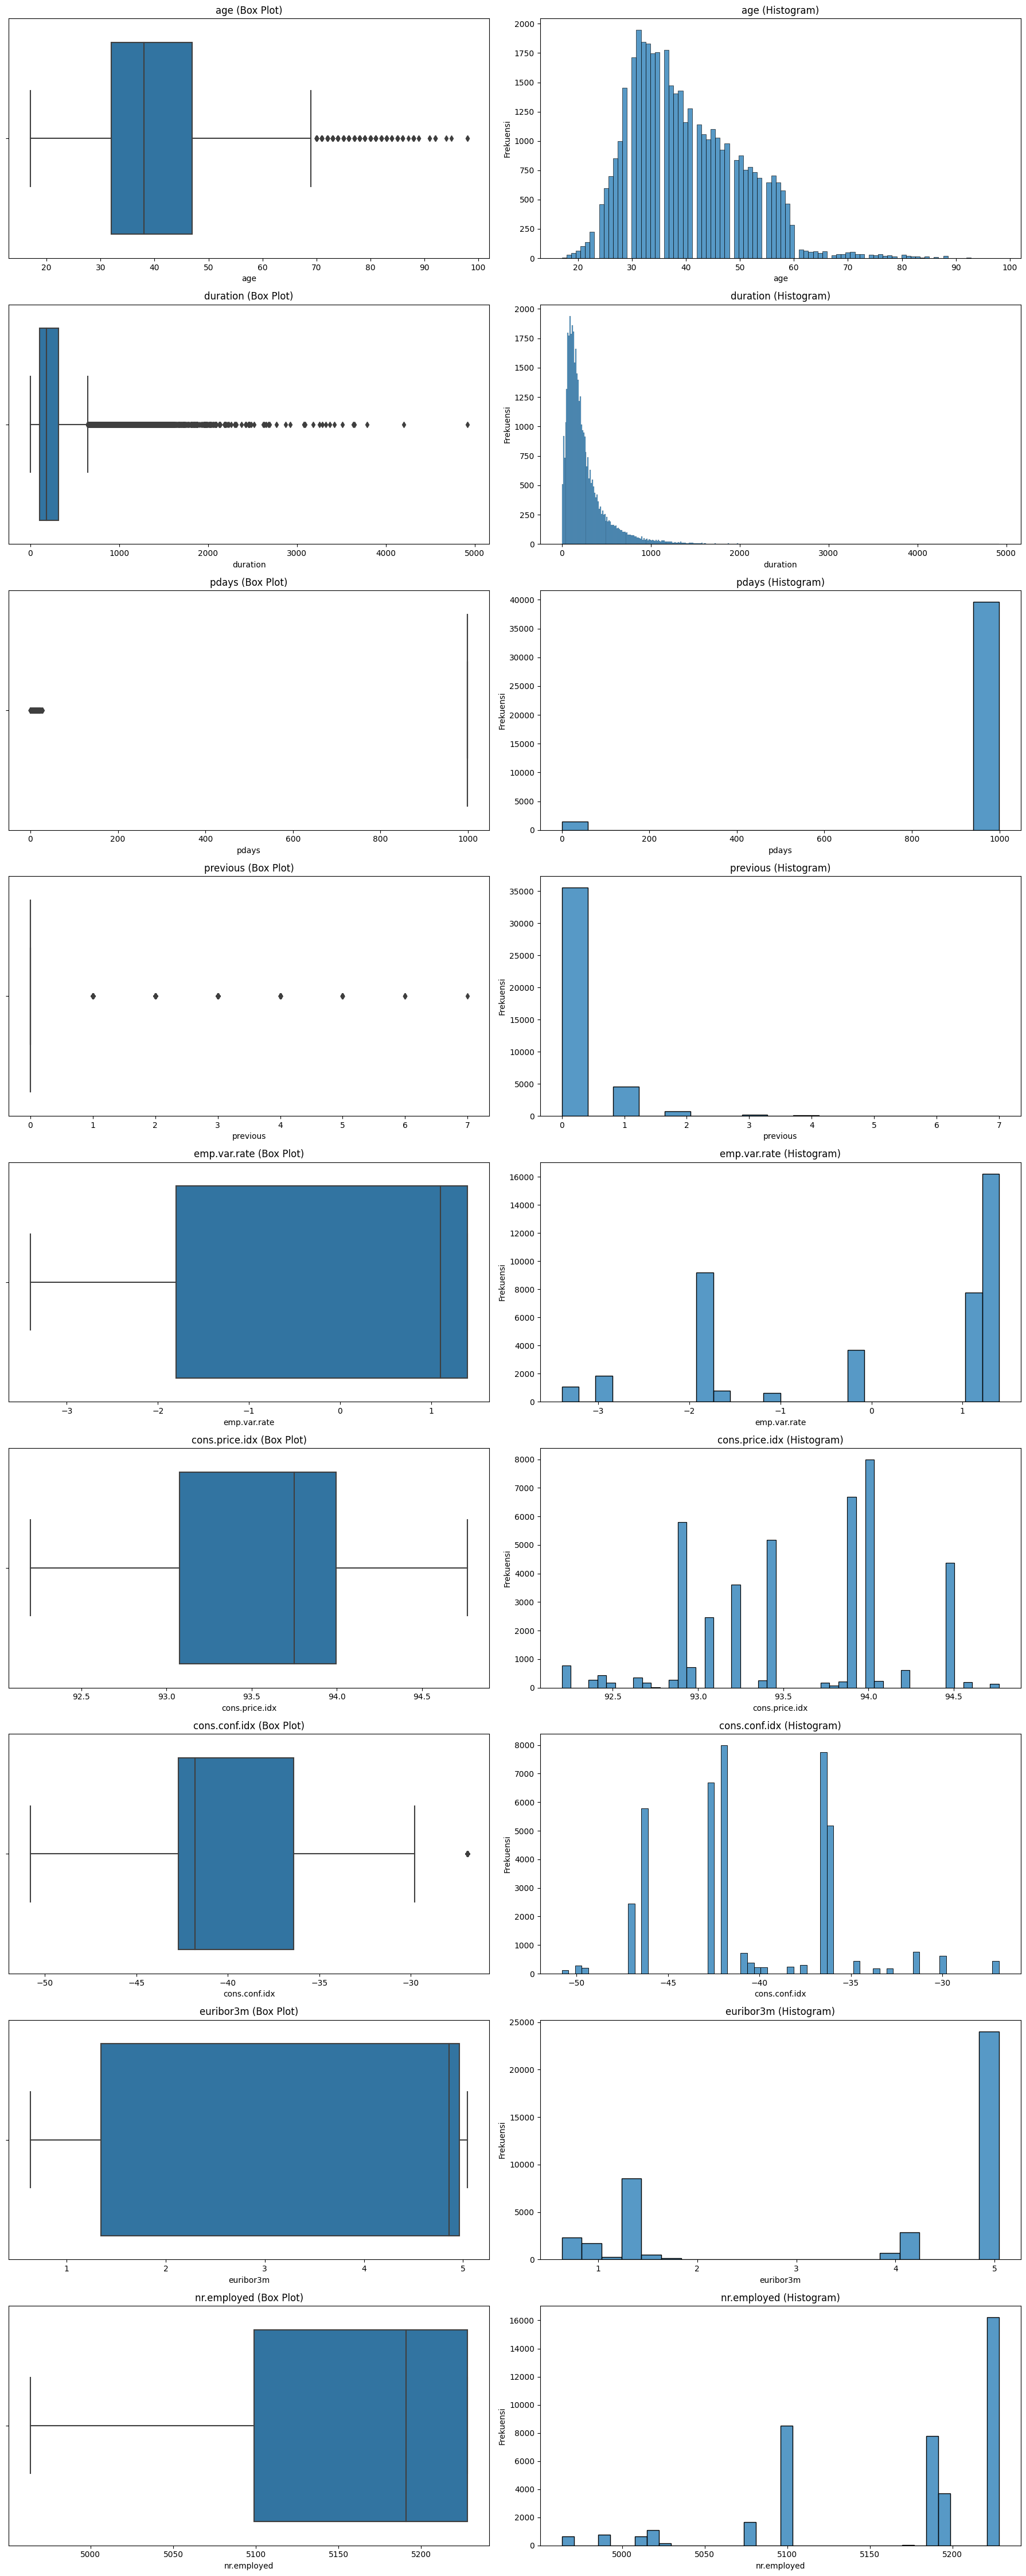

In [82]:
numeric_variables = ['age', 'duration', 'pdays', 'previous',
                     'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

num_rows = len(numeric_variables)
num_cols = 2

plt.figure(figsize=(18, 5 * num_rows))

for i, num_var in enumerate(numeric_variables):
    plt.subplot(num_rows, num_cols, i * num_cols + 1)
    sns.boxplot(data=df, x=num_var, orient='h')
    plt.xlabel(num_var)
    plt.title(f"{num_var} (Box Plot)")

    plt.subplot(num_rows, num_cols, i * num_cols + 2)
    sns.histplot(data=df, x=num_var, kde=False)
    plt.xlabel(num_var)
    plt.ylabel('Frekuensi')
    plt.title(f"{num_var} (Histogram)")

plt.tight_layout()
plt.show()

## Data Preprocessing

### Label Encoding

In [83]:
label_encoder = LabelEncoder()

temp = df.copy()
for kolom in df.columns:
    if temp[kolom].dtype == 'object':
        temp.loc[:, kolom] = label_encoder.fit_transform(temp[kolom])

temp

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,2,0,0,1,6,1,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,1,0,1,6,1,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,1,1,6,1,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,5,0,1,0,0,7,0,334,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,1,1,5,0,0,0,0,7,0,383,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,5,1,6,0,1,0,0,7,0,189,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,9,1,5,0,0,0,0,7,0,442,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1


In [84]:
kolom = temp.columns
temp[kolom] = temp[kolom].astype(float)
temp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  float64
 1   job             41176 non-null  float64
 2   marital         41176 non-null  float64
 3   education       41176 non-null  float64
 4   default         41176 non-null  float64
 5   housing         41176 non-null  float64
 6   loan            41176 non-null  float64
 7   contact         41176 non-null  float64
 8   month           41176 non-null  float64
 9   day_of_week     41176 non-null  float64
 10  duration        41176 non-null  float64
 11  campaign        41176 non-null  float64
 12  pdays           41176 non-null  float64
 13  previous        41176 non-null  float64
 14  poutcome        41176 non-null  float64
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null  floa

In [85]:
temp

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,3.0,1.0,0.0,0.0,0.0,0.0,1.0,6.0,1.0,261.0,1.0,999.0,0.0,1.0,1.1,93.994,-36.4,4.857,5191.0,0.0
1,57.0,7.0,1.0,3.0,2.0,0.0,0.0,1.0,6.0,1.0,149.0,1.0,999.0,0.0,1.0,1.1,93.994,-36.4,4.857,5191.0,0.0
2,37.0,7.0,1.0,3.0,0.0,1.0,0.0,1.0,6.0,1.0,226.0,1.0,999.0,0.0,1.0,1.1,93.994,-36.4,4.857,5191.0,0.0
3,40.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,6.0,1.0,151.0,1.0,999.0,0.0,1.0,1.1,93.994,-36.4,4.857,5191.0,0.0
4,56.0,7.0,1.0,3.0,0.0,0.0,1.0,1.0,6.0,1.0,307.0,1.0,999.0,0.0,1.0,1.1,93.994,-36.4,4.857,5191.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73.0,5.0,1.0,5.0,0.0,1.0,0.0,0.0,7.0,0.0,334.0,1.0,999.0,0.0,1.0,-1.1,94.767,-50.8,1.028,4963.6,1.0
41184,46.0,1.0,1.0,5.0,0.0,0.0,0.0,0.0,7.0,0.0,383.0,1.0,999.0,0.0,1.0,-1.1,94.767,-50.8,1.028,4963.6,0.0
41185,56.0,5.0,1.0,6.0,0.0,1.0,0.0,0.0,7.0,0.0,189.0,2.0,999.0,0.0,1.0,-1.1,94.767,-50.8,1.028,4963.6,0.0
41186,44.0,9.0,1.0,5.0,0.0,0.0,0.0,0.0,7.0,0.0,442.0,1.0,999.0,0.0,1.0,-1.1,94.767,-50.8,1.028,4963.6,1.0


### Correlation Variabel

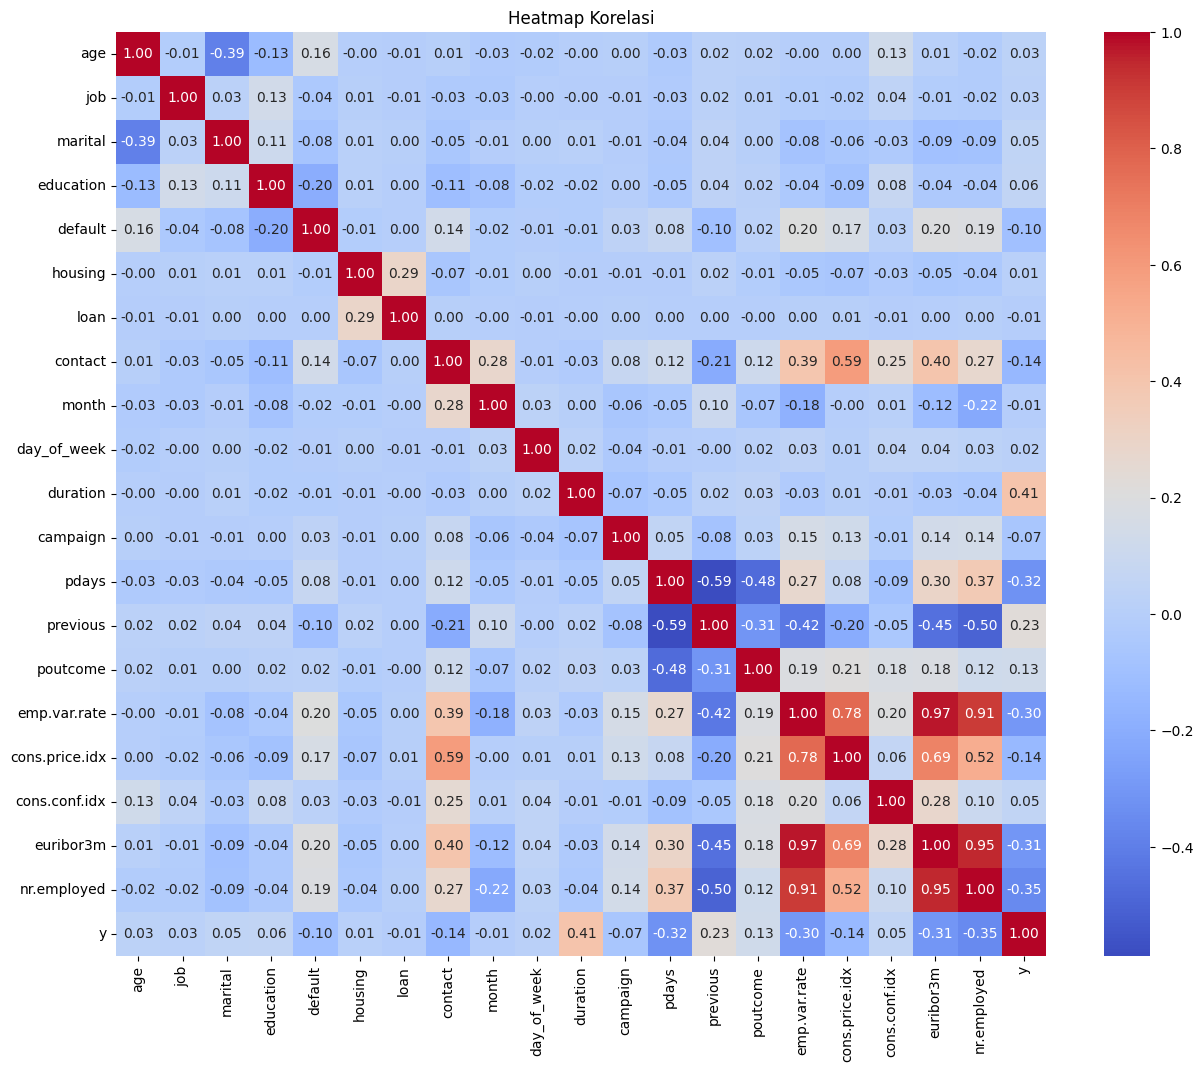

In [86]:
correlation_matrix = temp.corr()

plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap Korelasi")
plt.show()

### Pemilihan Fitur

In [87]:
feature_cols = ['marital', 'education', 'loan', 'contact',
                'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'default', 'poutcome']

X = temp[feature_cols]
y = temp['y']

In [88]:
X

,marital,education,loan,contact,month,day_of_week,duration,campaign,pdays,previous,default,poutcome
0,1.0,0.0,0.0,1.0,6.0,1.0,261.0,1.0,999.0,0.0,0.0,1.0
1,1.0,3.0,0.0,1.0,6.0,1.0,149.0,1.0,999.0,0.0,2.0,1.0
2,1.0,3.0,0.0,1.0,6.0,1.0,226.0,1.0,999.0,0.0,0.0,1.0
3,1.0,1.0,0.0,1.0,6.0,1.0,151.0,1.0,999.0,0.0,0.0,1.0
4,1.0,3.0,1.0,1.0,6.0,1.0,307.0,1.0,999.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
41183,1.0,5.0,0.0,0.0,7.0,0.0,334.0,1.0,999.0,0.0,0.0,1.0
41184,1.0,5.0,0.0,0.0,7.0,0.0,383.0,1.0,999.0,0.0,0.0,1.0
41185,1.0,6.0,0.0,0.0,7.0,0.0,189.0,2.0,999.0,0.0,0.0,1.0
41186,1.0,5.0,0.0,0.0,7.0,0.0,442.0,1.0,999.0,0.0,0.0,1.0


### Splitting Data dan Imbalance Dataset

In [89]:
# train 80% dan test 20%
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=10)


# Terapkan SMOTE untuk menangani ketidakseimbangan kelas (setelah pembagian data)
smote = SMOTE()
x_train, y_train = smote.fit_resample(x_train, y_train)

# Skalasi fitur
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [90]:
print('x train (baris,kolom) : ', x_train.shape)
print('x test  (baris,kolom) : ', x_test.shape)
print('\ny train (baris,kolom) : ', y_train.shape)
print('y test  (baris,kolom) : ', y_test.shape)

x train (baris,kolom) :  (58350, 12)
x test  (baris,kolom) :  (8236, 12)

y train (baris,kolom) :  (58350,)
y test  (baris,kolom) :  (8236,)


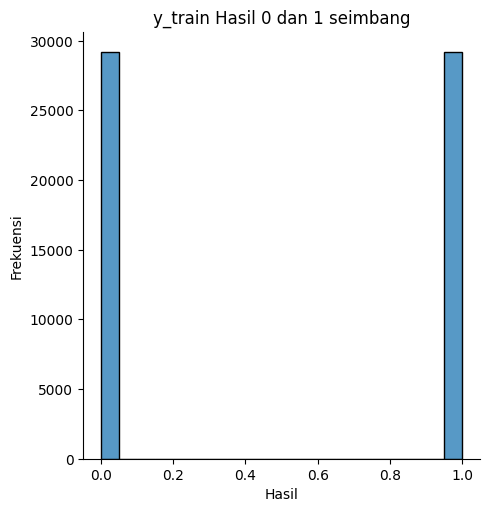

In [91]:
sns.displot(y_train)
plt.xlabel('Hasil')
plt.ylabel('Frekuensi')
plt.title('y_train Hasil 0 dan 1 seimbang')
plt.show()

## Logistic Regression

### Penginplementasian Model Logistic Regression

In [92]:
model_Logistic_Regression = LogisticRegression(solver='liblinear', C=10.0)
model_Logistic_Regression.fit(x_train, y_train)

LogisticRegression(C=10.0, solver='liblinear')

In [93]:
# x_test
y_pred = model_Logistic_Regression.predict(x_test)

print("Jumlah nilai 1 dalam y_pred : ", np.count_nonzero(y_pred == 1))
print("Jumlah nilai 0 dalam y_pred : ", np.count_nonzero(y_pred == 0))

Jumlah nilai 1 dalam y_pred :  1868
Jumlah nilai 0 dalam y_pred :  6368


In [94]:
# x_train
y_pred_train = model_Logistic_Regression.predict(x_train)
print("Jumlah nilai 1 dalam y_pred_train : ",
      np.count_nonzero(y_pred_train == 1))
print("Jumlah nilai 0 dalam y_pred_train : ",
      np.count_nonzero(y_pred_train == 0))

Jumlah nilai 1 dalam y_pred_train :  26911
Jumlah nilai 0 dalam y_pred_train :  31439


In [95]:
print(model_Logistic_Regression.intercept_)
print()
print(model_Logistic_Regression.coef_)

[0.20809251]

[[ 0.12716447  0.18497129 -0.02993596 -0.54041588  0.00391782  0.0226015
   1.96829691 -0.38880115 -0.6489037   0.27147533 -0.4532999   0.07352403]]


### Accuracy, Precision, Recall, F1-Score

In [96]:
# Evaluasi model pada data x_test
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("F1-Score  : ", f1)
print('Recall    : ', recall)
print('Precision : ', precision)
print('Accuracy  : ', accuracy)
print()
print(classification_report(y_test, y_pred))

F1-Score  :  0.4908825674690008
Recall    :  0.7700228832951945
Precision :  0.3602783725910064
Accuracy  :  0.8305002428363283

              precision    recall  f1-score   support

         0.0       0.97      0.84      0.90      7362
         1.0       0.36      0.77      0.49       874

    accuracy                           0.83      8236
   macro avg       0.66      0.80      0.69      8236
weighted avg       0.90      0.83      0.86      8236



In [97]:
# Evaluasi model pada data x_train
f1_train = f1_score(y_train, y_pred_train)
recall_train = recall_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train)
accuracy_train = accuracy_score(y_train, y_pred_train)

print("F1-Score  : ", f1_train)
print('Recall    : ', recall_train)
print('Precision : ', precision_train)
print('Accuracy  : ', accuracy_train)
print()
print(classification_report(y_train, y_pred_train))

F1-Score  :  0.7981671005241949
Recall    :  0.76719794344473
Precision :  0.8317416669763293
Accuracy  :  0.8059982862039418

              precision    recall  f1-score   support

         0.0       0.78      0.84      0.81     29175
         1.0       0.83      0.77      0.80     29175

    accuracy                           0.81     58350
   macro avg       0.81      0.81      0.81     58350
weighted avg       0.81      0.81      0.81     58350



In [98]:
if abs(f1 - f1_train) <= 0.05 and abs(recall - recall_train) <= 0.05:
    print("Model tidak mengalami perbedaan skor yang signifikan antara train set dan test set.")
else:
    print("Model mengalami perbedaan skor yang signifikan antara train set dan test set, mungkin mengalami overfitting atau underfitting.")

Model mengalami perbedaan skor yang signifikan antara train set dan test set, mungkin mengalami overfitting atau underfitting.


### Receiver Operating Characteristic (ROC)

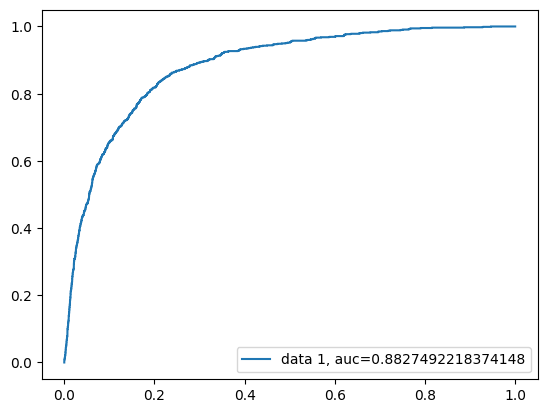

In [99]:
y_pred_proba = model_Logistic_Regression.predict_proba(x_test)[::, 1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### Confusion Matrix

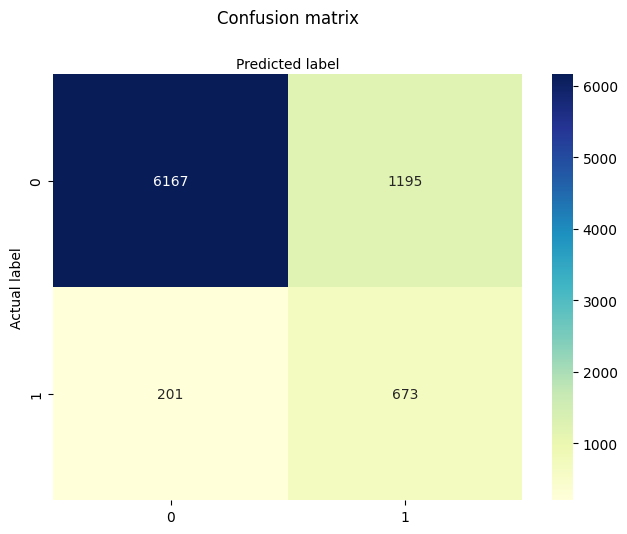

In [100]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

class_names = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

## K-Nearest Neighbors

### Penginplementasian Model K-Nearest Neighbors

In [101]:
model_K_Nearest_Neighbors = KNeighborsClassifier(n_neighbors=3)
model_K_Nearest_Neighbors .fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [102]:
y_pred = model_K_Nearest_Neighbors.predict(x_test)

print("Jumlah nilai 1 dalam y_pred : ", np.count_nonzero(y_pred == 1))
print("Jumlah nilai 0 dalam y_pred : ", np.count_nonzero(y_pred == 0))

Jumlah nilai 1 dalam y_pred :  1184
Jumlah nilai 0 dalam y_pred :  7052


In [103]:
y_pred_train = model_K_Nearest_Neighbors.predict(x_train)
print("Jumlah nilai 1 dalam y_pred_train : ",
      np.count_nonzero(y_pred_train == 1))
print("Jumlah nilai 0 dalam y_pred_train : ",
      np.count_nonzero(y_pred_train == 0))

Jumlah nilai 1 dalam y_pred_train :  30251
Jumlah nilai 0 dalam y_pred_train :  28099


### Accuracy, Precision, Recall, F1-Score

In [104]:
# Evaluasi model pada data x_test
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("F1-Score  : ", f1)
print('Recall    : ', recall)
print('Precision : ', precision)
print('Accuracy  : ', accuracy)
print()
print(classification_report(y_test, y_pred))

F1-Score  :  0.47619047619047616
Recall    :  0.5606407322654462
Precision :  0.41385135135135137
Accuracy  :  0.8691112190383682

              precision    recall  f1-score   support

         0.0       0.95      0.91      0.93      7362
         1.0       0.41      0.56      0.48       874

    accuracy                           0.87      8236
   macro avg       0.68      0.73      0.70      8236
weighted avg       0.89      0.87      0.88      8236



In [105]:
# Evaluasi model pada data x_train
f1_train = f1_score(y_train, y_pred_train)
recall_train = recall_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train)
accuracy_train = accuracy_score(y_train, y_pred_train)

print("F1-Score  : ", f1_train)
print('Recall    : ', recall_train)
print('Precision : ', precision_train)
print('Accuracy  : ', accuracy_train)
print()
print(classification_report(y_train, y_pred_train))

F1-Score  :  0.9646619324874635
Recall    :  0.9824507283633248
Precision :  0.9475058675746256
Accuracy  :  0.9640102827763496

              precision    recall  f1-score   support

         0.0       0.98      0.95      0.96     29175
         1.0       0.95      0.98      0.96     29175

    accuracy                           0.96     58350
   macro avg       0.96      0.96      0.96     58350
weighted avg       0.96      0.96      0.96     58350



### Confusion Matrix

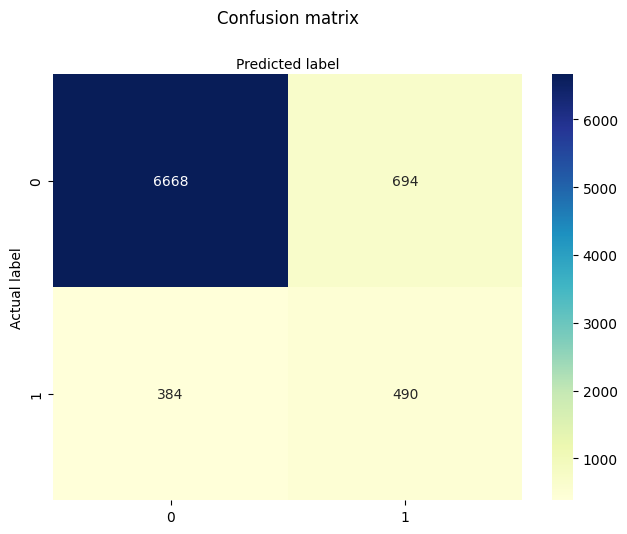

In [106]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

class_names = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

### Cek Accuracy, precision, Recall, F1-Score untuk berbagai Neighbors

In [107]:
n_neighbors_values = [3, 5, 7, 10, 13, 15, 17, 21, 23, 25, 27, 29, 31]

results = []

for n_neighbors in n_neighbors_values:
    model_knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    model_knn.fit(x_train, y_train)

    y_pred = model_knn.predict(x_test)

    result = {
        'n_neighbors': n_neighbors,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred)
    }

    results.append(result)

df_results = pd.DataFrame(results)

df_results

,n_neighbors,Accuracy,Recall,Precision,F1-Score
0,3,0.869111,0.560641,0.413851,0.476190
1,5,0.866440,0.612128,0.412809,0.493088
2,7,0.867411,0.629291,0.417299,0.501825
3,10,0.876882,0.607551,0.441764,0.511561
4,13,0.869840,0.649886,0.425787,0.514493
5,15,0.870204,0.660183,0.427724,0.519118
6,17,0.868990,0.655606,0.424130,0.515056
7,21,0.871175,0.655606,0.429857,0.519257
8,23,0.872997,0.659039,0.435045,0.524113
9,25,0.873725,0.668192,0.437781,0.528986


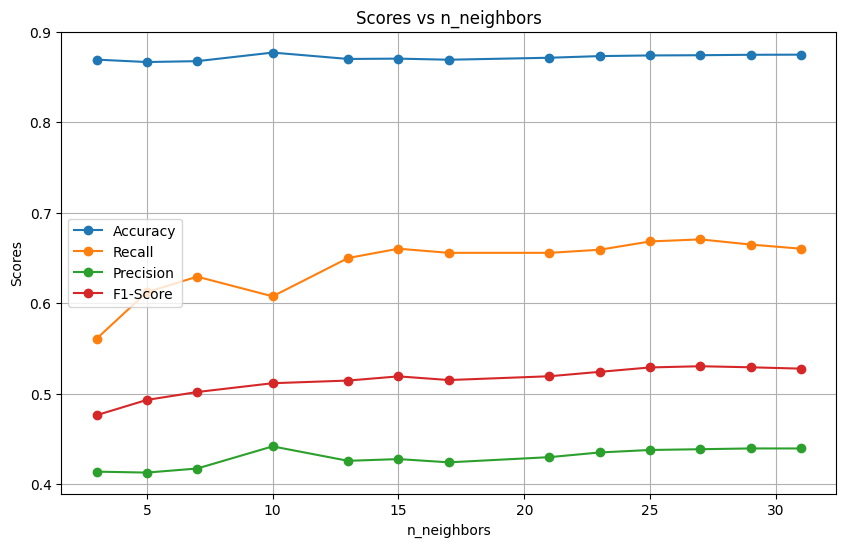

In [108]:
plt.figure(figsize=(10, 6))

plt.plot(df_results['n_neighbors'], df_results['Accuracy'],
         label='Accuracy', marker='o')
plt.plot(df_results['n_neighbors'], df_results['Recall'],
         label='Recall', marker='o')
plt.plot(df_results['n_neighbors'], df_results['Precision'],
         label='Precision', marker='o')
plt.plot(df_results['n_neighbors'], df_results['F1-Score'],
         label='F1-Score', marker='o')

plt.xlabel('n_neighbors')
plt.ylabel('Scores')
plt.title('Scores vs n_neighbors')
plt.legend()
plt.grid(True)


plt.show()

## Support Vector Machine


### Penginplementasian Model Support Vector Machine

In [109]:
model_SVM = SVC(kernel='linear')
model_SVM.fit(x_train, y_train)

SVC(kernel='linear')

In [110]:
y_pred = model_SVM.predict(x_test)

print("Jumlah nilai 1 dalam y_pred : ", np.count_nonzero(y_pred == 1))
print("Jumlah nilai 0 dalam y_pred : ", np.count_nonzero(y_pred == 0))

Jumlah nilai 1 dalam y_pred :  1782
Jumlah nilai 0 dalam y_pred :  6454


In [111]:
y_pred_train = model_SVM.predict(x_train)

print("Jumlah nilai 1 dalam y_pred_train : ",
      np.count_nonzero(y_pred_train == 1))
print("Jumlah nilai 0 dalam y_pred_train : ",
      np.count_nonzero(y_pred_train == 0))

Jumlah nilai 1 dalam y_pred_train :  26327
Jumlah nilai 0 dalam y_pred_train :  32023


### Accuracy, Precision, Recall, F1-Score

In [112]:
# Evaluasi model pada data x_test
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("F1-Score  : ", f1)
print('Recall    : ', recall)
print('Precision : ', precision)
print('Accuracy  : ', accuracy)
print()
print(classification_report(y_test, y_pred))

F1-Score  :  0.4962349397590362
Recall    :  0.7540045766590389
Precision :  0.36980920314253646
Accuracy  :  0.837542496357455

              precision    recall  f1-score   support

         0.0       0.97      0.85      0.90      7362
         1.0       0.37      0.75      0.50       874

    accuracy                           0.84      8236
   macro avg       0.67      0.80      0.70      8236
weighted avg       0.90      0.84      0.86      8236



In [113]:
# Evaluasi model pada data x_train
f1_train = f1_score(y_train, y_pred_train)
recall_train = recall_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train)
accuracy_train = accuracy_score(y_train, y_pred_train)

print("F1-Score  : ", f1_train)
print('Recall    : ', recall_train)
print('Precision : ', precision_train)
print('Accuracy  : ', accuracy_train)
print()
print(classification_report(y_train, y_pred_train))

F1-Score  :  0.7949983784368131
Recall    :  0.7561953727506426
Precision :  0.8379990124207087
Accuracy  :  0.8050042844901457

              precision    recall  f1-score   support

         0.0       0.78      0.85      0.81     29175
         1.0       0.84      0.76      0.79     29175

    accuracy                           0.81     58350
   macro avg       0.81      0.81      0.80     58350
weighted avg       0.81      0.81      0.80     58350



### Confusion Matrix

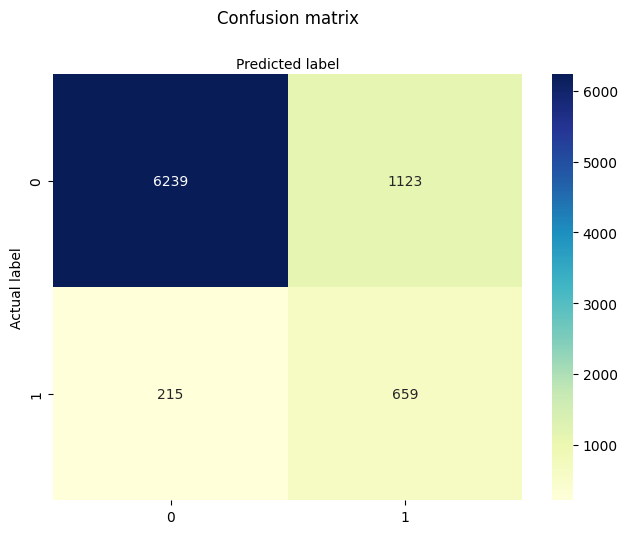

In [114]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

class_names = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

## Decision Tree

### Penginplementasian Model Decision Tree

In [115]:
model_Decision_Tree = DecisionTreeClassifier()
model_Decision_Tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [116]:
y_pred = model_Decision_Tree.predict(x_test)

print("Jumlah nilai 1 dalam y_pred : ", np.count_nonzero(y_pred == 1))
print("Jumlah nilai 0 dalam y_pred : ", np.count_nonzero(y_pred == 0))

Jumlah nilai 1 dalam y_pred :  1060
Jumlah nilai 0 dalam y_pred :  7176


In [117]:
y_pred_train = model_Decision_Tree.predict(x_train)
print("Jumlah nilai 1 dalam y_pred_train : ",
      np.count_nonzero(y_pred_train == 1))
print("Jumlah nilai 0 dalam y_pred_train : ",
      np.count_nonzero(y_pred_train == 0))

Jumlah nilai 1 dalam y_pred_train :  29162
Jumlah nilai 0 dalam y_pred_train :  29188


### Accuracy, Precision, Recall, F1-Score

In [118]:
# Evaluasi model pada data x_test
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("F1-Score  : ", f1)
print('Recall    : ', recall)
print('Precision : ', precision)
print('Accuracy  : ', accuracy)
print()
print(classification_report(y_test, y_pred))

F1-Score  :  0.4343329886246122
Recall    :  0.4805491990846682
Precision :  0.39622641509433965
Accuracy  :  0.8671685284118504

              precision    recall  f1-score   support

         0.0       0.94      0.91      0.92      7362
         1.0       0.40      0.48      0.43       874

    accuracy                           0.87      8236
   macro avg       0.67      0.70      0.68      8236
weighted avg       0.88      0.87      0.87      8236



In [119]:
# Evaluasi model pada data x_train
f1_train = f1_score(y_train, y_pred_train)
recall_train = recall_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train)
accuracy_train = accuracy_score(y_train, y_pred_train)

print("F1-Score  : ", f1_train)
print('Recall    : ', recall_train)
print('Precision : ', precision_train)
print('Accuracy  : ', accuracy_train)
print()
print(classification_report(y_train, y_pred_train))

F1-Score  :  0.9997771568644256
Recall    :  0.99955441302485
Precision :  1.0
Accuracy  :  0.9997772065124251

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     29175
         1.0       1.00      1.00      1.00     29175

    accuracy                           1.00     58350
   macro avg       1.00      1.00      1.00     58350
weighted avg       1.00      1.00      1.00     58350



### Confusion Matrix

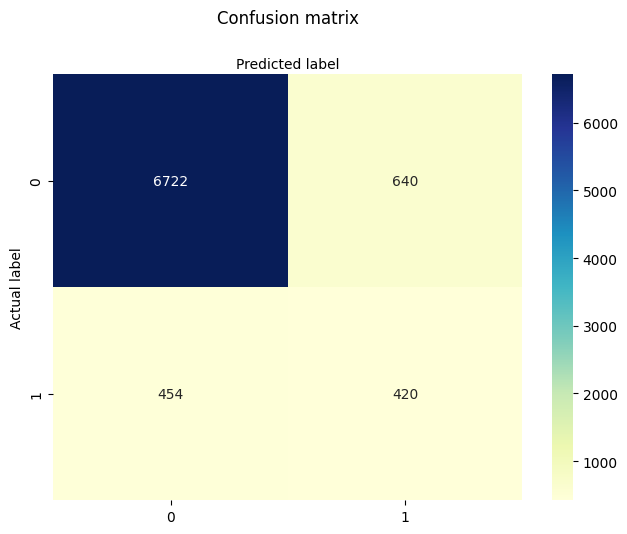

In [120]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

class_names = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

## Random Forest

### Penginplementasian Model Random Forest

In [121]:
model_Random_Forest = RandomForestClassifier()
model_Random_Forest.fit(x_train, y_train)

RandomForestClassifier()

In [122]:
y_pred = model_Random_Forest.predict(x_test)

print("Jumlah nilai 1 dalam y_pred : ", np.count_nonzero(y_pred == 1))
print("Jumlah nilai 0 dalam y_pred : ", np.count_nonzero(y_pred == 0))

Jumlah nilai 1 dalam y_pred :  739
Jumlah nilai 0 dalam y_pred :  7497


In [123]:
y_pred_train = model_Random_Forest.predict(x_train)
print("Jumlah nilai 1 dalam y_pred_train : ",
      np.count_nonzero(y_pred_train == 1))
print("Jumlah nilai 0 dalam y_pred_train : ",
      np.count_nonzero(y_pred_train == 0))

Jumlah nilai 1 dalam y_pred_train :  29163
Jumlah nilai 0 dalam y_pred_train :  29187


### Accuracy, Precision, Recall, F1-Score

In [124]:
# Evaluasi model pada data x_test
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("F1-Score  : ", f1)
print('Recall    : ', recall)
print('Precision : ', precision)
print('Accuracy  : ', accuracy)
print()
print(classification_report(y_test, y_pred))

F1-Score  :  0.4984500929944203
Recall    :  0.459954233409611
Precision :  0.543978349120433
Accuracy  :  0.9017727051966974

              precision    recall  f1-score   support

         0.0       0.94      0.95      0.95      7362
         1.0       0.54      0.46      0.50       874

    accuracy                           0.90      8236
   macro avg       0.74      0.71      0.72      8236
weighted avg       0.90      0.90      0.90      8236



In [125]:
# Evaluasi model pada data x_train
f1_train = f1_score(y_train, y_pred_train)
recall_train = recall_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train)
accuracy_train = accuracy_score(y_train, y_pred_train)

print("F1-Score  : ", f1_train)
print('Recall    : ', recall_train)
print('Precision : ', precision_train)
print('Accuracy  : ', accuracy_train)
print()
print(classification_report(y_train, y_pred_train))

F1-Score  :  0.9997600191984641
Recall    :  0.99955441302485
Precision :  0.9999657099749683
Accuracy  :  0.9997600685518423

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     29175
         1.0       1.00      1.00      1.00     29175

    accuracy                           1.00     58350
   macro avg       1.00      1.00      1.00     58350
weighted avg       1.00      1.00      1.00     58350



### Confusion Matrix

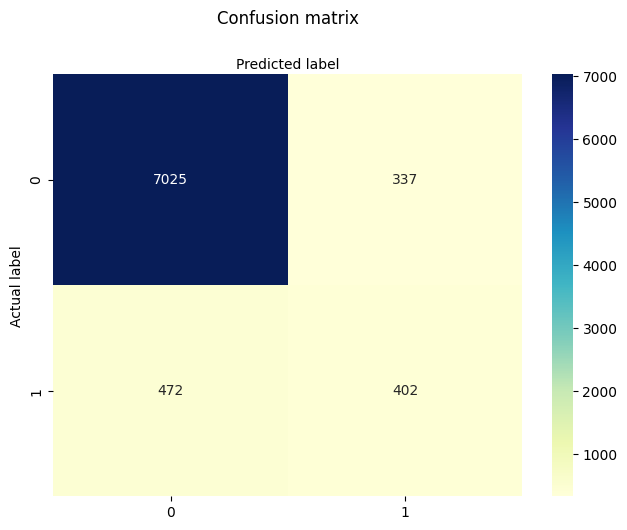

In [126]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

class_names = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

## Naive Bayes


### Penginplementasian Model Naive Bayes

In [127]:
model_Naive_Bayes = GaussianNB()
model_Naive_Bayes.fit(x_train, y_train)

GaussianNB()

In [128]:
y_pred = model_Naive_Bayes.predict(x_test)

print("Jumlah nilai 1 dalam y_pred : ", np.count_nonzero(y_pred == 1))
print("Jumlah nilai 0 dalam y_pred : ", np.count_nonzero(y_pred == 0))

Jumlah nilai 1 dalam y_pred :  1381
Jumlah nilai 0 dalam y_pred :  6855


In [129]:
y_pred_train = model_Naive_Bayes.predict(x_train)
print("Jumlah nilai 1 dalam y_pred_train : ",
      np.count_nonzero(y_pred_train == 1))
print("Jumlah nilai 0 dalam y_pred_train : ",
      np.count_nonzero(y_pred_train == 0))

Jumlah nilai 1 dalam y_pred_train :  20103
Jumlah nilai 0 dalam y_pred_train :  38247


### Accuracy, Precision, Recall, F1-Score

In [130]:
# Evaluasi model pada data x_test
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("F1-Score  : ", f1)
print('Recall    : ', recall)
print('Precision : ', precision)
print('Accuracy  : ', accuracy)
print()
print(classification_report(y_test, y_pred))

F1-Score  :  0.4283813747228381
Recall    :  0.5526315789473685
Precision :  0.3497465604634323
Accuracy  :  0.8434919864011656

              precision    recall  f1-score   support

         0.0       0.94      0.88      0.91      7362
         1.0       0.35      0.55      0.43       874

    accuracy                           0.84      8236
   macro avg       0.65      0.72      0.67      8236
weighted avg       0.88      0.84      0.86      8236



In [131]:
# Evaluasi model pada data x_train
f1_train = f1_score(y_train, y_pred_train)
recall_train = recall_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train)
accuracy_train = accuracy_score(y_train, y_pred_train)

print("F1-Score  : ", f1_train)
print('Recall    : ', recall_train)
print('Precision : ', precision_train)
print('Accuracy  : ', accuracy_train)
print()
print(classification_report(y_train, y_pred_train))

F1-Score  :  0.6749056374041154
Recall    :  0.569974293059126
Precision :  0.827189971646023
Accuracy  :  0.7254498714652956

              precision    recall  f1-score   support

         0.0       0.67      0.88      0.76     29175
         1.0       0.83      0.57      0.67     29175

    accuracy                           0.73     58350
   macro avg       0.75      0.73      0.72     58350
weighted avg       0.75      0.73      0.72     58350



### Confusion Matrix

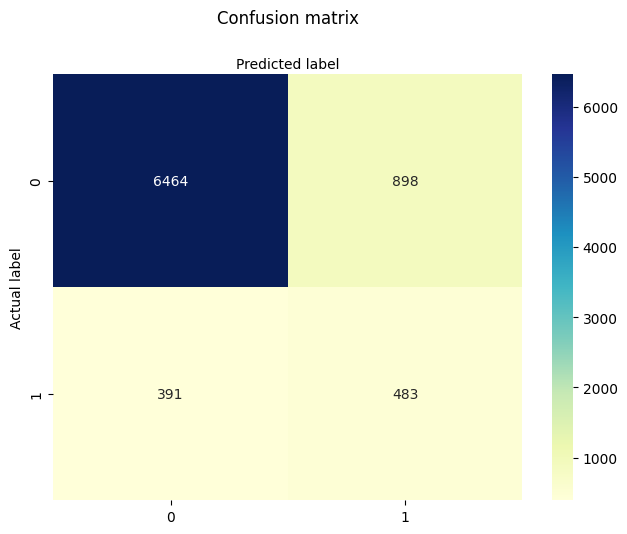

In [132]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

class_names = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

## Analisis Algoritma

Dalam analisis model machine learning untuk tugas klasifikasi, telah diuji beberapa algoritma termasuk Logistic Regression, K-Nearest Neighbors, Support Vector Machine, Decision Trees, Random Forest, dan Naive Bayes. Dari hasil analisis tersebut, ditemukan bahwa model Random Forest memiliki akurasi tertinggi, mencapai 90%, yang lebih baik dibandingkan dengan model lainnya.

Random Forest memiliki kelebihan dalam mengurangi risiko overfitting dengan menggabungkan berbagai pohon keputusan dan mampu menilai relatif pentingnya fitur-fitur. Namun, penggunaan Random Forest memerlukan tuning parameter yang hati-hati.

K-Nearest Neighbors (KNN) juga memberikan hasil yang baik dengan akurasi sebesar 86,9%, menjadikannya model kedua terbaik. KNN sangat cocok untuk melakukan klasifikasi pada data yang tidak memiliki hubungan linier antara fitur dan target.

Logistic Regression memiliki akurasi yang lebih rendah, yaitu sekitar 83%, namun memiliki kelebihan dalam kemudahan interpretasi. Model ini cocok untuk data yang memiliki hubungan linier antara fitur dan target, serta dapat digunakan untuk klasifikasi biner atau multikelas.

Dalam kasus ini, pemilihan Logistic Regression diambil karena alasan kemudahan interpretasi, kecepatan komputasi dibandingkan dengan SVM, dan kesesuaian dengan data target yang hanya memiliki dua nilai, yaitu "yes" dan "no". Selain itu, Logistic Regression cocok digunakan untuk data klasifikasi seperti yang memiliki variabel age, marital, education, dan lainnya. Logistic Regression sesuai dengan sifat data yang dimiliki.